<a href="https://colab.research.google.com/github/arunsghub2025/bostonhousepricing/blob/main/LinearRegrML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dataset=pd.DataFrame(data,columns=feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# from sklearn.datasets import fetch_openml
# boston = fetch_openml(name="house_prices", as_frame=True)

In [4]:
dataset['Price']=target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
## Summarizing The Stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Check the missing values
dataset.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
### Exploratory Data Analysis
## Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
# import seaborn as sns
# sns.pairplot(dataset)

Text(0, 0.5, 'Price')

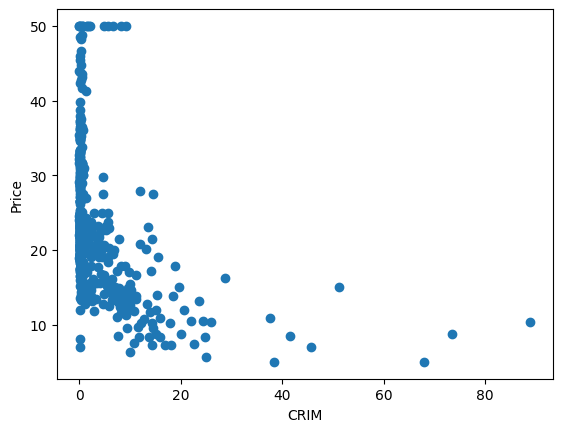

In [10]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel("CRIM")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

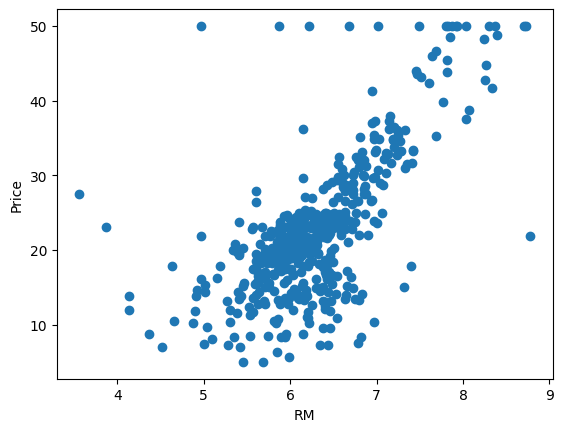

In [11]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

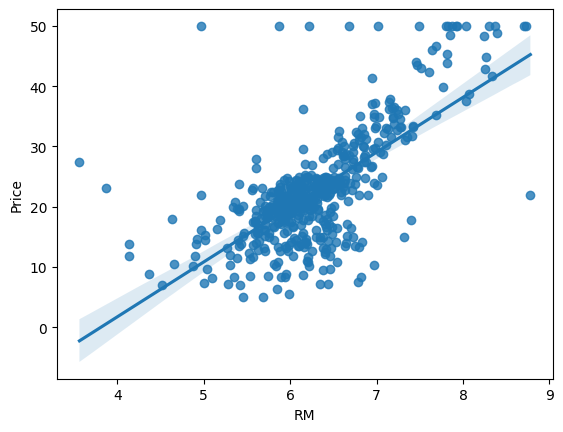

In [12]:
import seaborn as sns
sns.regplot(x="RM", y="Price", data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

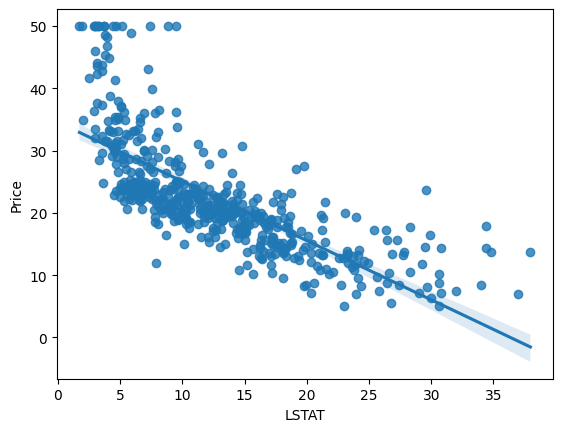

In [13]:
import seaborn as sns
sns.regplot(x="LSTAT", y="Price", data=dataset)

In [14]:
# Independent and dependent features
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
Y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [16]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [18]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [19]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [20]:
print(regression.intercept_)

23.01581920903955


In [21]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [22]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [23]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [24]:
# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(reg_pred, columns=['Predicted_Price'])

# Create a DataFrame from the X_test input values
# We need the feature names to properly label the columns
x_test_df = pd.DataFrame(X_test, columns=feature_names)

# Combine X_test input values with the predicted prices
combined_results_df = pd.concat([x_test_df, predictions_df], axis=1)

# Display the combined DataFrame
display(combined_results_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted_Price
0,-0.406801,-0.505125,-1.022256,-0.281546,-0.405218,0.125771,0.553831,-0.527348,-0.514369,-0.667776,-0.744571,0.412412,-0.476058,28.648960
1,-0.411057,1.266629,-0.681651,3.551814,-0.945403,0.601965,-1.299478,0.146831,-0.630274,-0.920352,-0.300837,0.428541,-1.251858,36.495014
2,-0.405120,-0.505125,2.396785,-0.281546,0.443643,-0.477130,1.085934,-0.893900,-0.630274,1.827911,0.808498,0.350317,0.795352,15.411193
3,-0.406818,-0.505125,-0.046624,-0.281546,-1.236931,-0.362955,-2.208034,0.716631,-0.630274,-0.613653,0.409138,0.359533,-0.971669,25.403213
4,0.195119,-0.505125,1.005500,-0.281546,1.335376,-0.039923,0.832552,-0.658340,1.687825,1.557294,0.852872,0.292484,0.682714,18.855280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.753159,-0.505125,1.005500,-0.281546,1.566884,0.111847,1.028018,-0.801108,1.687825,1.557294,0.852872,0.302507,0.999510,17.403672
148,-0.298824,-0.505125,-0.431970,-0.281546,-0.165136,-0.713835,1.129371,0.155121,-0.630274,-0.601625,1.207859,0.401353,1.050198,13.385941
149,-0.354399,-0.505125,-0.711959,-0.281546,-0.456664,3.340777,0.514014,-0.410487,-0.166654,-0.601625,-0.389583,0.256886,-1.096979,39.983425
150,0.254235,-0.505125,1.005500,-0.281546,1.335376,0.153618,0.691381,-0.683022,1.687825,1.557294,0.852872,-2.989701,0.534875,16.682863


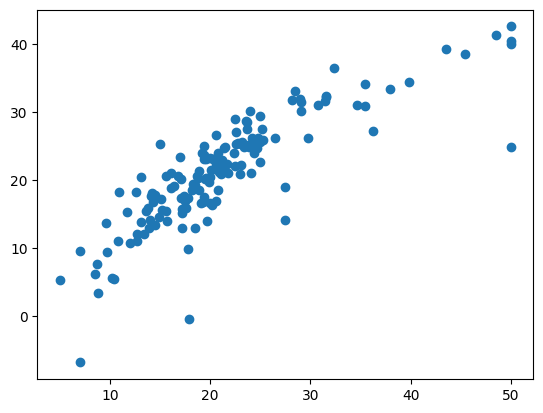

In [25]:
## plot a scatter plot for the prediction
plt.scatter(Y_test,reg_pred)

In [26]:
## Residuals
residuals=Y_test-reg_pred

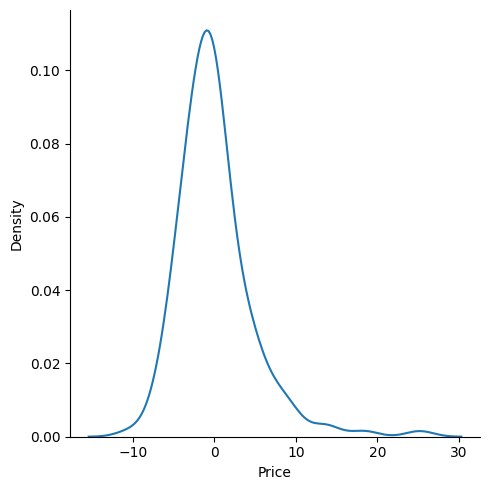

In [27]:
## Plot this residuals

sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Residuals')

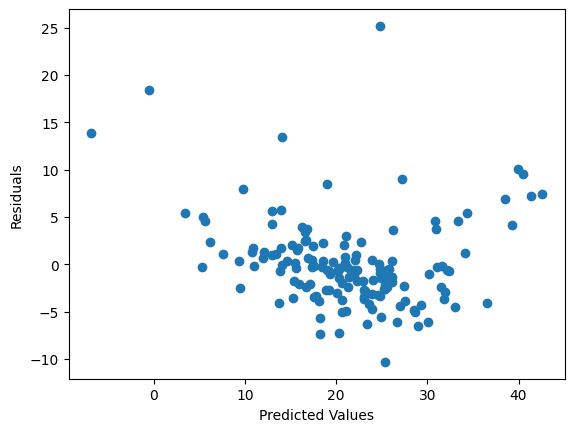

In [28]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,reg_pred))
print(mean_squared_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

3.1627098714574053
21.51744423117721
4.6386899261728205


# **R square and adjusted R square**


---

Formula:

`R^2 = 1 - SSR/SST`

R^2 = coefficient of determination

SSR = sum of squares of residuals

SST = total sum of squares

In [30]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.7112260057484932


In [31]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6840226584639308

In [32]:
data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [33]:
##transformation of new data
scaler.transform(data[0].reshape(1,-1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [34]:

regression.predict(scaler.transform(data[0].reshape(1,-1)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

In [35]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [36]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))
## Prediction
pickled_model.predict(scaler.transform(data[0].reshape(1,-1)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])